## Basic Graphing with matplotlib
* Line graph
* Histogram
* Scatter plot

### Libraries we will be using 
* pep 8 (style guide for Python) suggests these should be in alphabetical order

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal
from scipy.stats import norm

### Initialization of variable for simulating security price

In [2]:
r = .0525
T = 1/252
sigma = .30
aapl = 189
prices = list()

### Simulation of one possible price path for an arbitrary quarter

In [9]:
np.random.seed(42)  # Set a seed for reproducibility
simulated_prices = [aapl]
for _ in range(63):  # simulate 63 days (one quarter)
    change = np.exp((r - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * normal())
    simulated_prices.append(simulated_prices[-1] * change)

print(simulated_prices[:5])

[189, np.float64(190.78817708259493), np.float64(190.2959713982292), np.float64(192.6452720452187), np.float64(198.27656516492746)]


### The plot method takes one or two variables and generates a line plot
* there are a long list of methods to augment and annotate your plots
* The semicolon surpresses entraneous output in the notebook setting 

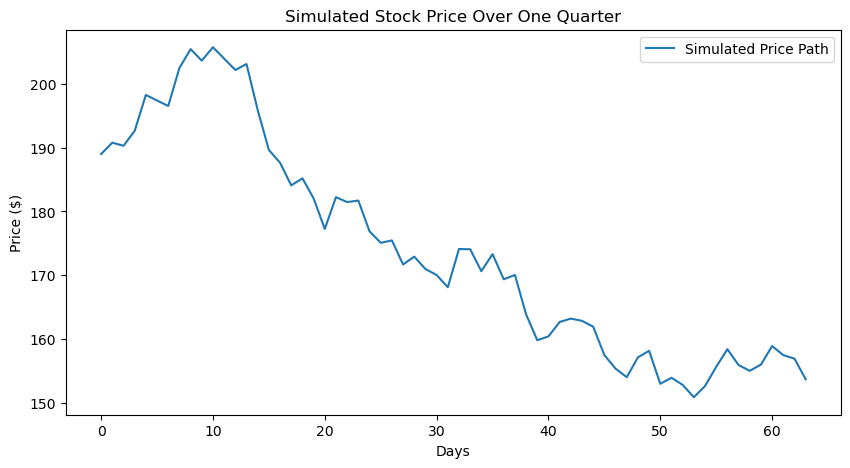

In [10]:
# Line Graph: Simulated Price Path
plt.figure(figsize=(10, 5))
plt.plot(simulated_prices, label="Simulated Price Path")
plt.xlabel("Days")
plt.ylabel("Price ($)")
plt.title("Simulated Stock Price Over One Quarter")
plt.legend()
plt.show()

### Simulation of 5000 possible paths
* reset the price variable before running

In [11]:
# Simulation of 5000 possible paths
num_paths = 5000
prices = np.zeros((num_paths, 63))
prices[:, 0] = aapl
for i in range(1, 63):
    prices[:, i] = prices[:, i - 1] * np.exp((r - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * normal(size=num_paths))

### Plot the first 10 paths
* as you can see it is easy to plot many lines on the same graph
* everyt time you use `plt.` it effects the current plot

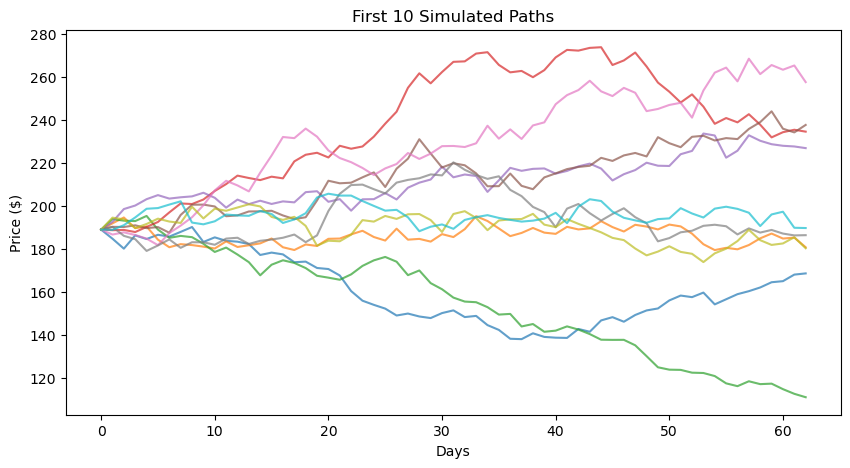

In [12]:
# Plot the first 10 paths
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.plot(prices[i], alpha=0.7)
plt.xlabel("Days")
plt.ylabel("Price ($)")
plt.title("First 10 Simulated Paths")
plt.show()

### Peel off the last value in each path and store in a new variable

In [13]:
# Peel off the last value in each path and store in a new variable
final_prices = prices[:, -1]

### Let's make a histogram of each path's ending price!
* plot data
* overlay a theoretical normal curve based on scipy normal model to see how the data fits
* Since a stocks price in the future generally reflects a lognormal ditribution, the overlay is more open-ended on the left

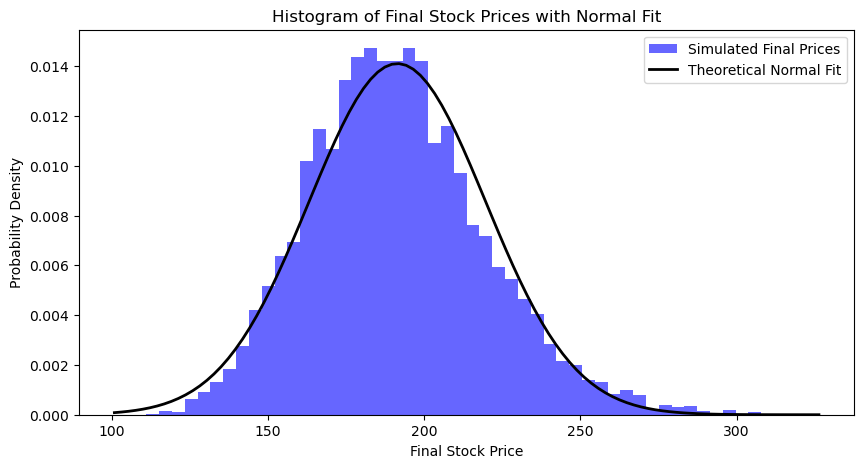

In [14]:
# Histogram: Distribution of Final Prices
plt.figure(figsize=(10, 5))
n, bins, _ = plt.hist(final_prices, bins=50, density=True, alpha=0.6, color='b', label="Simulated Final Prices")
# Overlay a theoretical normal curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(final_prices), np.std(final_prices))
plt.plot(x, p, 'k', linewidth=2, label="Theoretical Normal Fit")
plt.xlabel("Final Stock Price")
plt.ylabel("Probability Density")
plt.title("Histogram of Final Stock Prices with Normal Fit")
plt.legend()
plt.show()

### Using Seaborn to generate a simple histogram
* the kde (kernel density estimate) is not quite the thing as the previous normal overlay

### Scatter Plots

In [15]:
# Scatter Plot: Random Data with Regression Line
x = np.random.rand(100) * 10  # Generate random x values
y = 3 * x + 7 + np.random.randn(100) * 2  # Generate dependent y values

### Using NumPy to fit a simple regression model 

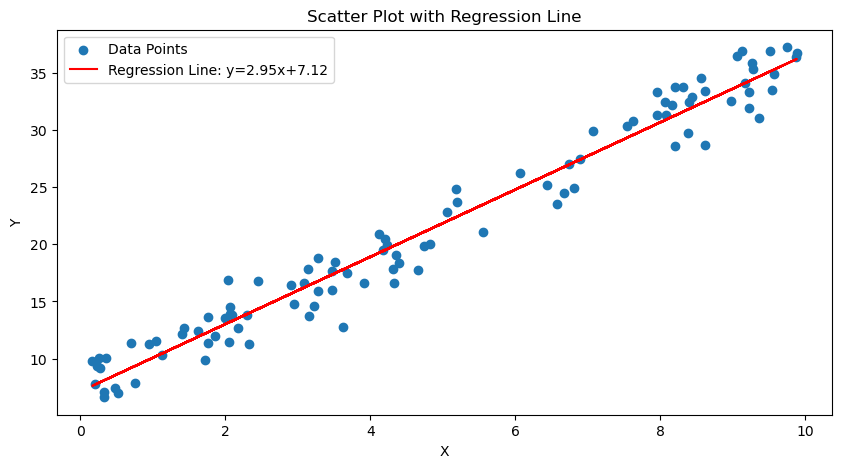

In [17]:
# Fit a simple regression model
m, b = np.polyfit(x, y, 1)

# Scatter plot with regression line
plt.figure(figsize=(10, 5))
plt.scatter(x, y, label="Data Points")
plt.plot(x, m * x + b, color='red', label=f"Regression Line: y={m:.2f}x+{b:.2f}")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatter Plot with Regression Line")
plt.legend()
plt.show()

### When generating random numbers it is sometime preferable to generate a constant stream
* This can be done by creating a default generator 
* Often this is referred to as the random seed

### There is a so-called object-oriented method of using matplotlib
* This involves assigning variables for two matplotlib objects
* These variables are commonly called fig and ax or axes
* This methodology may allow greater control over your output
* There are syntactic differences when using this method

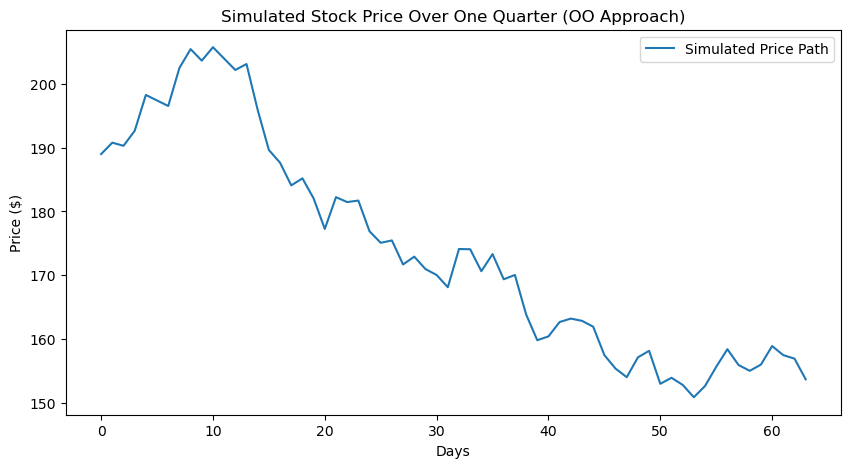

In [18]:
# Object-Oriented Approach with Matplotlib
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(simulated_prices, label="Simulated Price Path")
ax.set_xlabel("Days")
ax.set_ylabel("Price ($)")
ax.set_title("Simulated Stock Price Over One Quarter (OO Approach)")
ax.legend()
plt.show()

### Your work can be saved out to typical image formats (.png, .jpg)

In [21]:
# Save a figure
fig.savefig("simulated_stock_price.png")